First, import the required datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
lir = LinearRegression()

Now, load the required dataset i.e. advertising

In [3]:
df = pd.read_csv("advertising.csv")
df.head()  

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


to check whether the dataset has null values.

In [4]:
print(df.isna().sum())

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


From above, we can say that the dataset doesn't contains the null values. 

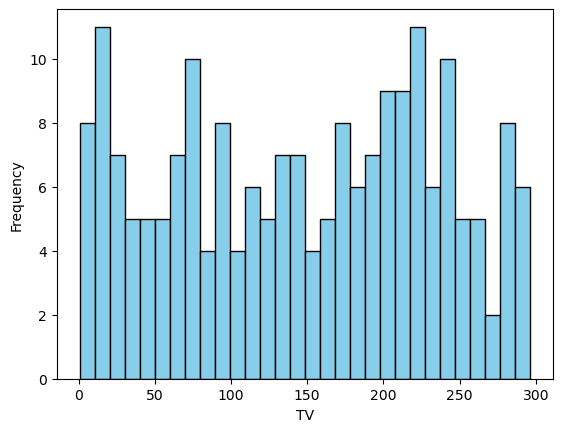

In [5]:
plt.hist(df['TV'],bins=30, color='skyblue', edgecolor='black')
plt.xlabel('TV')
plt.ylabel('Frequency')
plt.show()

Text(0, 0.5, 'Frequency')

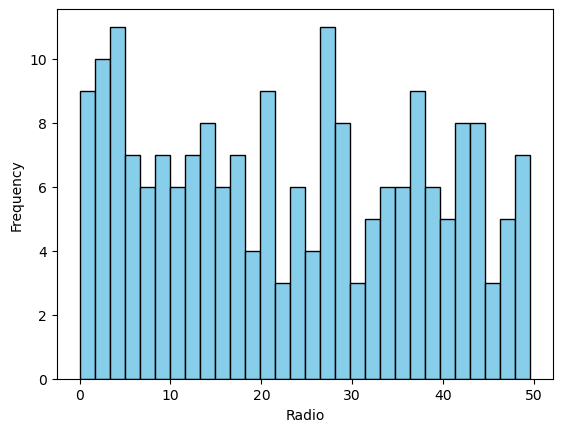

In [6]:
plt.hist(df['Radio'],bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Radio')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

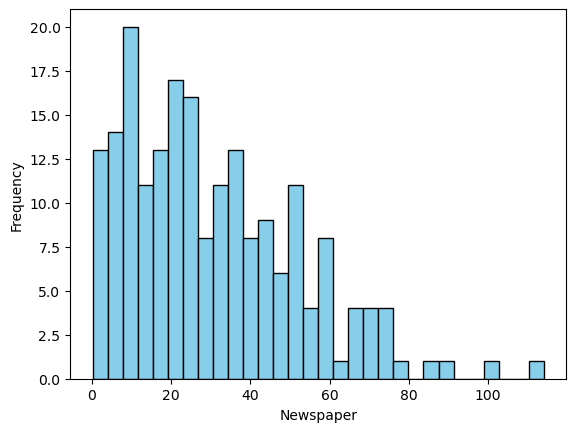

In [7]:
plt.hist(df['Newspaper'],bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Newspaper')
plt.ylabel('Frequency')

From the above histogram, we can say that the newspaper sales are decreasing than comapared to Radio and TV.

Now, plot the pairplot to compare the sales with (TV, Radio, Newspaper at a time). i.e. to observe the correlation

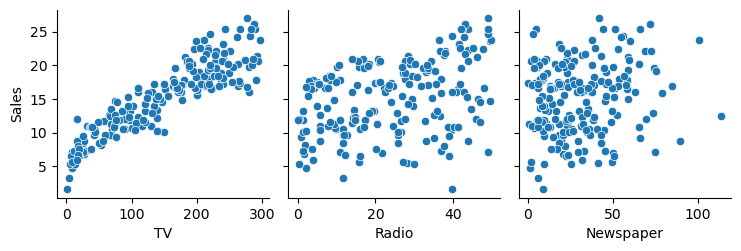

In [8]:
import warnings
warnings.filterwarnings("ignore")

sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales')
plt.show()




From the above plot, I observed that

--> the correlation of (TV vs Sales) is strong positive.

--> the correlation of (Radio vs Sales) is not that much efiicient. (less correlation)

--> the (Newspaper vs Sales) shows no correlation.


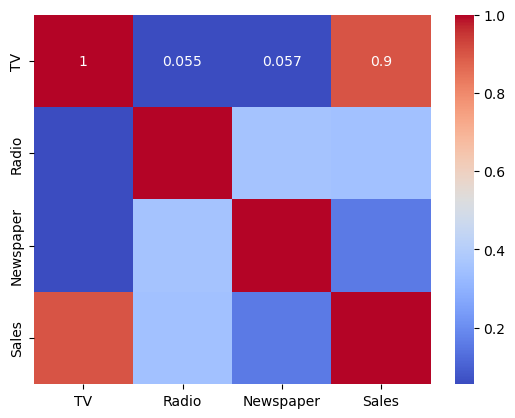

In [9]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

from the above heatmap, it's clear that SALES ARE HIGHLY CORRELATED WITH TV.

Now, train the model using LinearRegression.

we can also use RandomForestRegressor to train the model.

In [10]:
x = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [11]:
# Train a Linear Regression Model

lir.fit(x_train, y_train)
y_pred = lir.predict(x_test)

Let's find out the difference between the actual data and predicted data.

In [12]:
# Evaluate the Model
abs_error = mean_absolute_error(y_test, y_pred)
sqr_error = mean_squared_error(y_test, y_pred)
root_sqr_error = np.sqrt(sqr_error)
r2 = r2_score(y_test, y_pred)

In [13]:
print(f"Mean Absolute Error: {abs_error:.2f}")
print(f"Mean Squared Error: {sqr_error:.2f}")
print(f"Root Mean Squared Error: {root_sqr_error:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error: 1.42
Mean Squared Error: 4.52
Root Mean Squared Error: 2.13
R² Score: 0.86


Visualizing the Actual Sales with Predicted Sales.

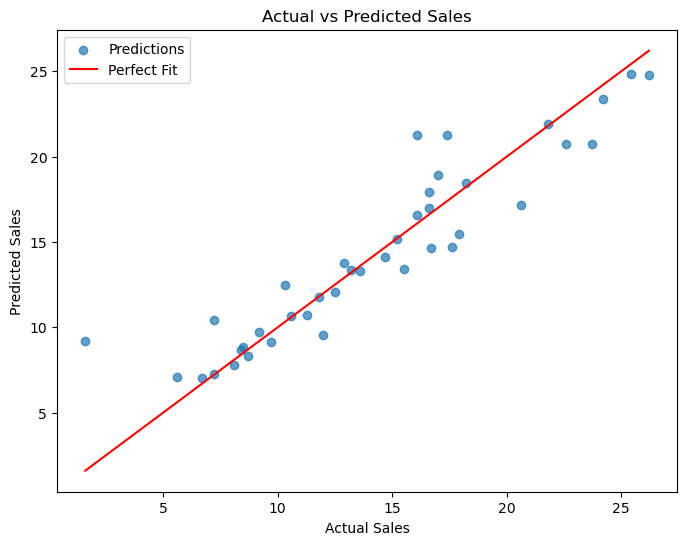

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, label="Predictions", alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', label="Perfect Fit")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.legend()
plt.show()


Finally, the actual Sales and predicted Sales are almost similar. Which means our model has successfully predicted the Sales using advertising dataset.